<a href="https://colab.research.google.com/github/ANAGHA-SREYAS/entri_dsml_tasks/blob/main/MNIST_CNN_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fashion MNIST Classification using CNN

IMPORTING LIBRARIES

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg

# utility functions
from tensorflow.keras.utils import to_categorical
# sequential model
from tensorflow.keras.models import Sequential
# layers
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

IMPORT TRAIN TEST CSV

In [5]:
train=pd.read_csv('/content/fashion-mnist_train.csv.zip')
test=pd.read_csv('/content/fashion-mnist_test.csv.zip')

In [6]:
# data shape
print(train.shape)
print(train.shape)

(60000, 785)
(60000, 785)


In [7]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# looking for missing values
print(train.isna().sum().sum())
print(test.isna().sum().sum())

0
0


In [9]:

# actural item corresponding to each label
item = {0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat',
        5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}

<ipython-input-10-ae0852c6ec9d>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 4, ind+1)


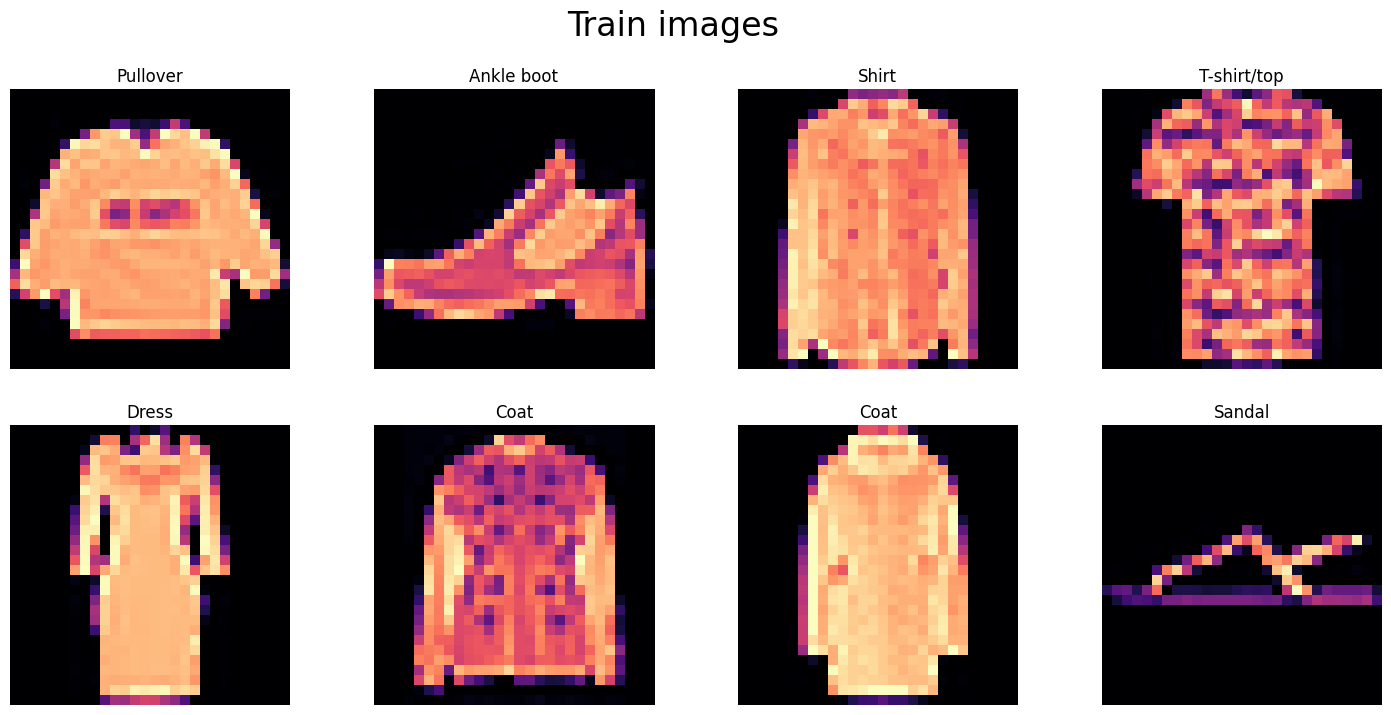

In [10]:
# first few train images with labels
fig, ax = plt.subplots(figsize=(18, 8))
for ind, row in train.iloc[:8, :].iterrows():
    plt.subplot(2, 4, ind+1)
    plt.title(item[row[0]])
    img = row.to_numpy()[1:].reshape(28, 28)
    fig.suptitle('Train images', fontsize=24)
    plt.axis('off')
    plt.imshow(img, cmap='magma')

<ipython-input-11-58be5b90b3ec>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 4, ind+1)


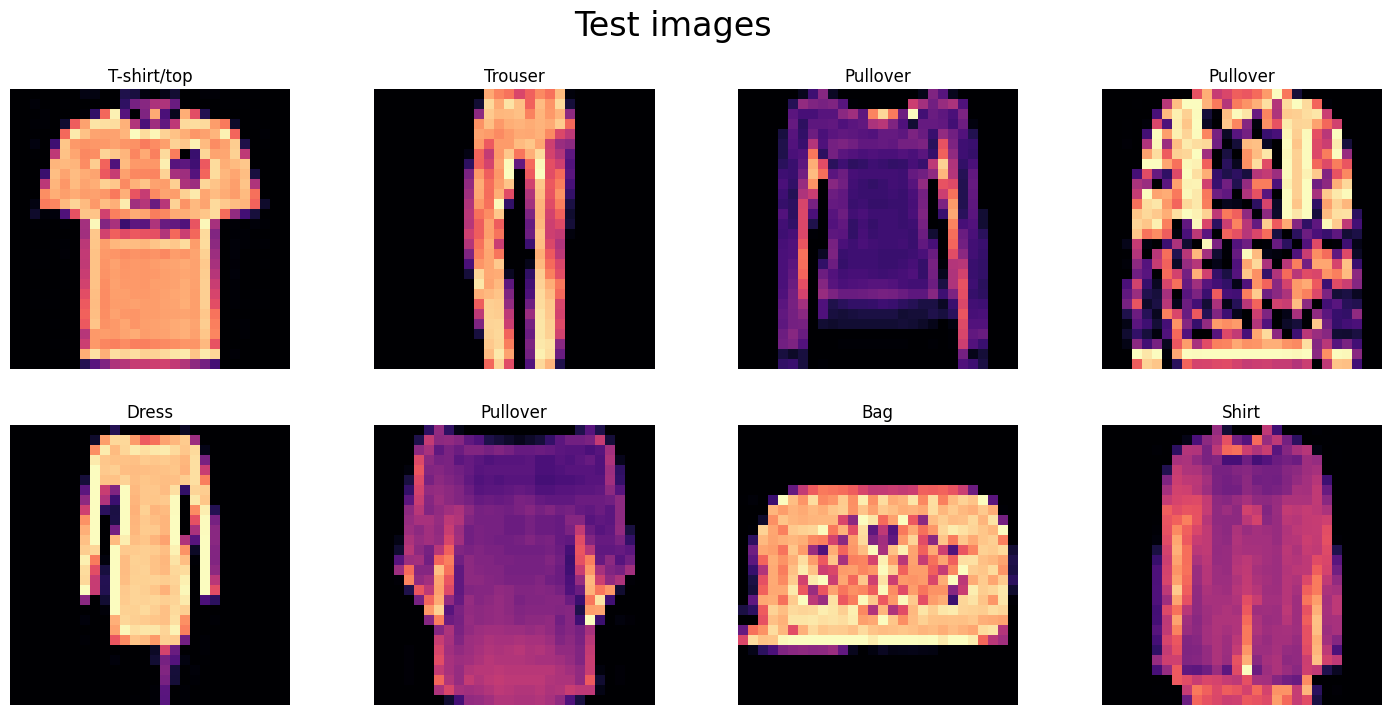

In [11]:
# first few test images with labels
fig, ax = plt.subplots(figsize=(18, 8))
for ind, row in test.iloc[:8, :].iterrows():
    plt.subplot(2, 4, ind+1)
    plt.title(item[row[0]])
    img = row.to_numpy()[1:].reshape(28, 28)
    fig.suptitle('Test images', fontsize=24)
    plt.axis('off')
    plt.imshow(img, cmap='magma')

PREPROCESSING

In [12]:
# split into image and labels and convert to numpy array
X_train = train.iloc[:, 1:].to_numpy()
y_train = train['label'].to_numpy()

X_test = test.iloc[:, 1:].to_numpy()
y_test = test['label'].to_numpy()

for i in [X_train, y_train, X_test, y_test]:
    print(i.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [13]:
# reshaping images
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [14]:
# fix data type
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [15]:
# normalizing images
X_train = X_train/255.0
X_test = X_test/255.0

In [17]:
# one hot encoding targets
from keras.utils import to_categorical
y_train_enc = to_categorical(y_train, num_classes=10)
y_test_enc = to_categorical(y_test, num_classes=10)

In [18]:
# shape
for i in [X_train, y_train_enc, X_test, y_test_enc]:
    print(i.shape)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


In [22]:
# train validation split
from sklearn.model_selection import train_test_split
X_train, X_val, y_train_enc, y_val_enc = train_test_split(X_train, y_train_enc, test_size=0.3)
for i in [X_train, y_train_enc, X_val, y_val_enc]:
    print(i.shape)

(42000, 28, 28, 1)
(42000, 10)
(18000, 28, 28, 1)
(18000, 10)


# CNN

Model parameters

In [23]:
INPUT_SHAPE = (28,28,1)
OUTPUT_SHAPE = 10
BATCH_SIZE = 128
EPOCHS = 10
VERBOSE = 2

Defining model

In [27]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=INPUT_SHAPE))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))

Compile model

In [28]:
# If the targets are one-hot encoded, use categorical_crossentropy.
# But if the targets are integers, use sparse_categorical_crossentropy
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)              

Model fitting

In [30]:
history = model.fit(X_train, y_train_enc,
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    verbose=VERBOSE,
                    validation_split=0.3)

Epoch 1/10
230/230 - 27s - loss: 0.7922 - accuracy: 0.7140 - val_loss: 0.4848 - val_accuracy: 0.8213 - 27s/epoch - 116ms/step
Epoch 2/10
230/230 - 25s - loss: 0.4852 - accuracy: 0.8262 - val_loss: 0.3889 - val_accuracy: 0.8568 - 25s/epoch - 109ms/step
Epoch 3/10
230/230 - 22s - loss: 0.4038 - accuracy: 0.8563 - val_loss: 0.3564 - val_accuracy: 0.8675 - 22s/epoch - 96ms/step
Epoch 4/10
230/230 - 24s - loss: 0.3625 - accuracy: 0.8673 - val_loss: 0.3258 - val_accuracy: 0.8794 - 24s/epoch - 105ms/step
Epoch 5/10
230/230 - 26s - loss: 0.3369 - accuracy: 0.8781 - val_loss: 0.3062 - val_accuracy: 0.8863 - 26s/epoch - 115ms/step
Epoch 6/10
230/230 - 23s - loss: 0.3094 - accuracy: 0.8868 - val_loss: 0.3129 - val_accuracy: 0.8849 - 23s/epoch - 100ms/step
Epoch 7/10
230/230 - 23s - loss: 0.2881 - accuracy: 0.8954 - val_loss: 0.2796 - val_accuracy: 0.8948 - 23s/epoch - 101ms/step
Epoch 8/10
230/230 - 24s - loss: 0.2700 - accuracy: 0.9020 - val_loss: 0.2872 - val_accuracy: 0.8934 - 24s/epoch - 104m

Accuracy and loss

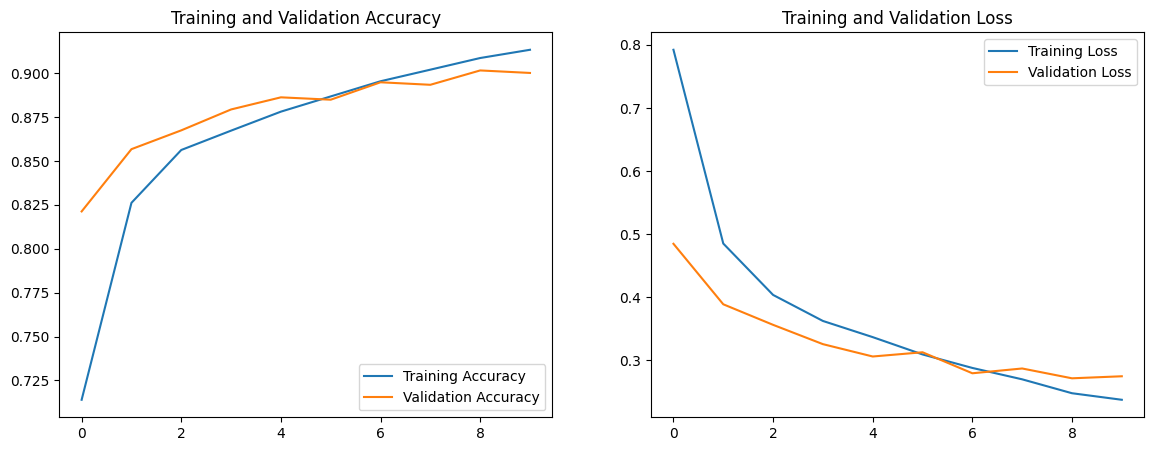

In [31]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.savefig('./foo.png')
plt.show()

Evaluating model

In [32]:
# model loss and accuracy on validation set
model.evaluate(X_val, y_val_enc)

563/563 [==============================] - 5s 8ms/step - loss: 0.2637 - accuracy: 0.9032


[0.2636621594429016, 0.903166651725769]

Predicting on test

In [33]:
# predicted values
y_pred_enc = model.predict(X_test)

# decoding predicted values
y_pred = [np.argmax(i) for i in y_pred_enc]

print(y_pred_enc[0])
print(y_pred[0])

313/313 [==============================] - 3s 8ms/step
[9.8164952e-01 1.8035211e-06 1.6265541e-04 3.1362059e-05 1.0941662e-06
 6.7650171e-07 1.8143460e-02 7.2474973e-09 9.5345786e-06 1.1643668e-07]
0


<ipython-input-34-e941a05ebcff>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 4, ind+1)


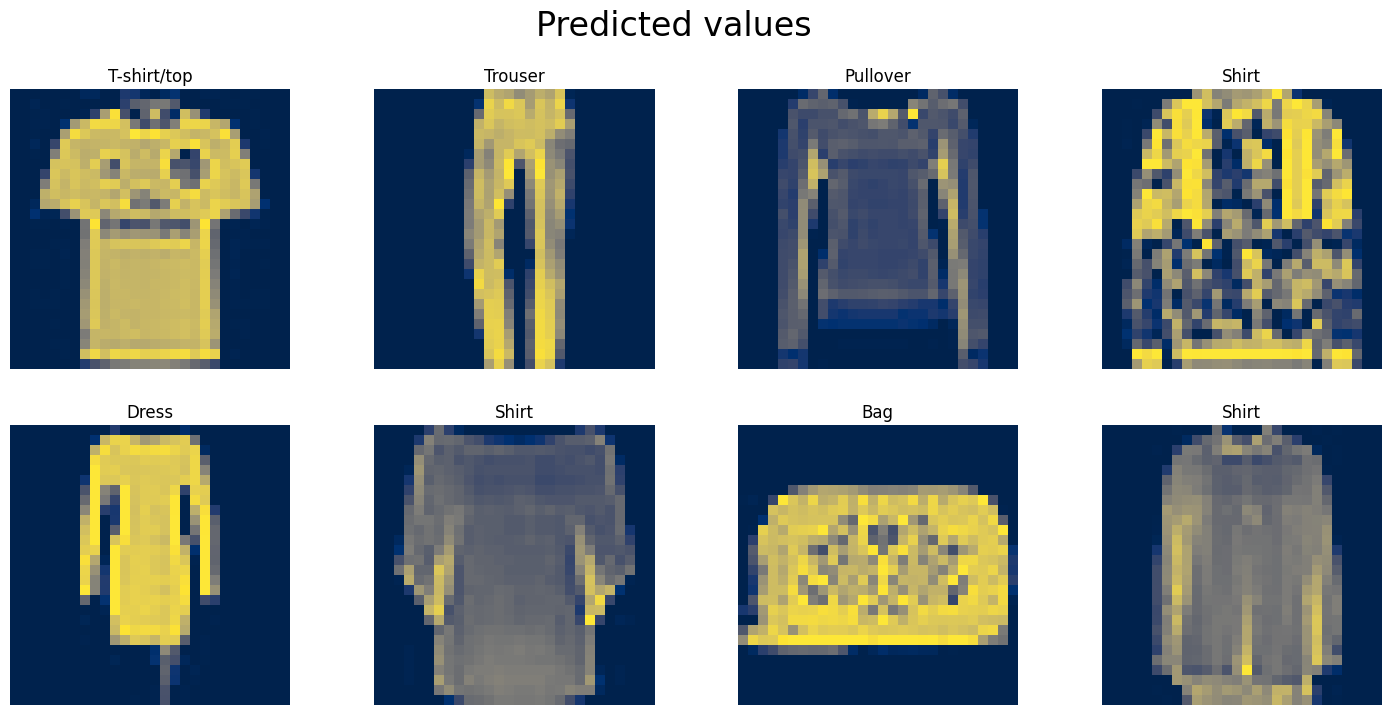

In [34]:
# predicted targets of each images
fig, ax = plt.subplots(figsize=(18, 8))
for ind, row in enumerate(X_test[:8]):
    plt.subplot(2, 4, ind+1)
    plt.title(item[y_pred[ind]])
    img = row.reshape(28, 28)
    fig.suptitle('Predicted values', fontsize=24)
    plt.axis('off')
    plt.imshow(img, cmap='cividis')

In [38]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1000
           1       0.98      0.99      0.98      1000
           2       0.91      0.78      0.84      1000
           3       0.90      0.92      0.91      1000
           4       0.79      0.92      0.85      1000
           5       0.99      0.96      0.97      1000
           6       0.74      0.72      0.73      1000
           7       0.96      0.94      0.95      1000
           8       0.97      0.99      0.98      1000
           9       0.94      0.98      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



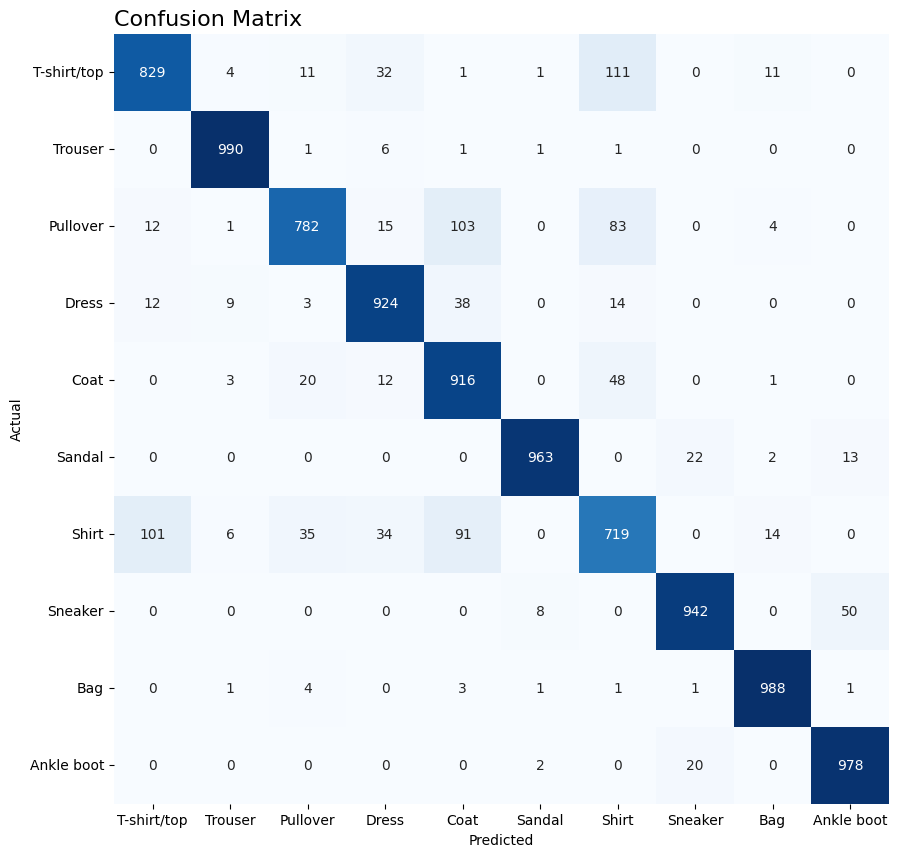

In [39]:
# y_pred_item = [item[i] for i in y_pred]
# y_test_item = [item[i] for i in y_test]

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True,
            cbar=False, fmt='1d', cmap='Blues', ax=ax)
ax.set_title('Confusion Matrix', loc='left', fontsize=16)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_xticklabels(item.values())
ax.set_yticklabels(item.values(), rotation=0)
plt.show()